In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet
import missingno

In [18]:
# CHECK FILE ENCODING
path_file = 'C:/Users/Alejandra/Documents/DS4A/67_repo/dS4A_team67/data/raw/ESTADISTICAS_EN_EDUCACION_BASICA_POR_MUNICIPIO.csv'
with open(path_file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [50]:
# READ CVS FILE
path_file = 'C:/Users/Alejandra/Documents/DS4A/67_repo/dS4A_team67/data/raw/ESTADISTICAS_EN_EDUCACION_BASICA_POR_MUNICIPIO.csv'
with open(path_file, 'r', encoding='utf-8') as f:
    df=pd.read_csv(f,encoding='utf-8')

In [4]:
df

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,5001,Medellín,5,Antioquia,3759,Medellín,386466.0,108.7300,108.5000,...,0.0300,0.0000,0.0000,0.0100,0.1700,4.5700,0.1500,3.2600,7.4400,2.9500
1,2011,5002,Abejorral,5,Antioquia,3758,Antioquia (ETC),4146.0,97.8100,97.8000,...,1.7000,0.0000,1.2300,2.9600,1.1800,0.8900,0.0000,0.8500,1.0800,1.2300
2,2011,5004,Abriaquí,5,Antioquia,3758,Antioquia (ETC),483.0,88.6100,88.6000,...,7.2900,0.0000,1.4700,14.6600,7.4600,1.6900,3.1300,1.4700,2.2200,0.0000
3,2011,5021,Alejandría,5,Antioquia,3758,Antioquia (ETC),702.0,118.5200,118.5000,...,3.5800,0.0000,2.1600,4.3900,8.0400,0.6000,0.0000,0.9600,0.0000,0.0000
4,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631.0,78.6500,78.7000,...,8.9900,0.2400,6.7300,14.4600,7.4500,0.4200,0.0000,0.2400,0.9100,0.0000
5,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552.0,97.7100,97.7000,...,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,0.8300,NaN,9.9300,4.4700
6,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244.0,84.4500,84.5000,...,0.5800,0.0000,0.5800,0.0400,2.6900,5.4100,0.7300,5.5300,6.9000,4.1100
7,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707.0,78.8500,78.9000,...,5.5900,0.0000,3.6100,9.5000,7.3200,0.7100,0.0000,0.7000,1.0800,0.0000
8,2011,5038,Angostura,5,Antioquia,3758,Antioquia (ETC),3344.0,81.7000,81.7000,...,2.8300,0.0000,3.7300,1.9300,2.2700,3.9200,0.0000,5.1600,1.9200,2.9600
9,2011,5040,Anorí,5,Antioquia,3758,Antioquia (ETC),3983.0,92.0900,92.1000,...,1.5800,0.0000,2.1400,1.0000,0.4200,0.4800,0.0000,0.6900,0.0000,0.0000


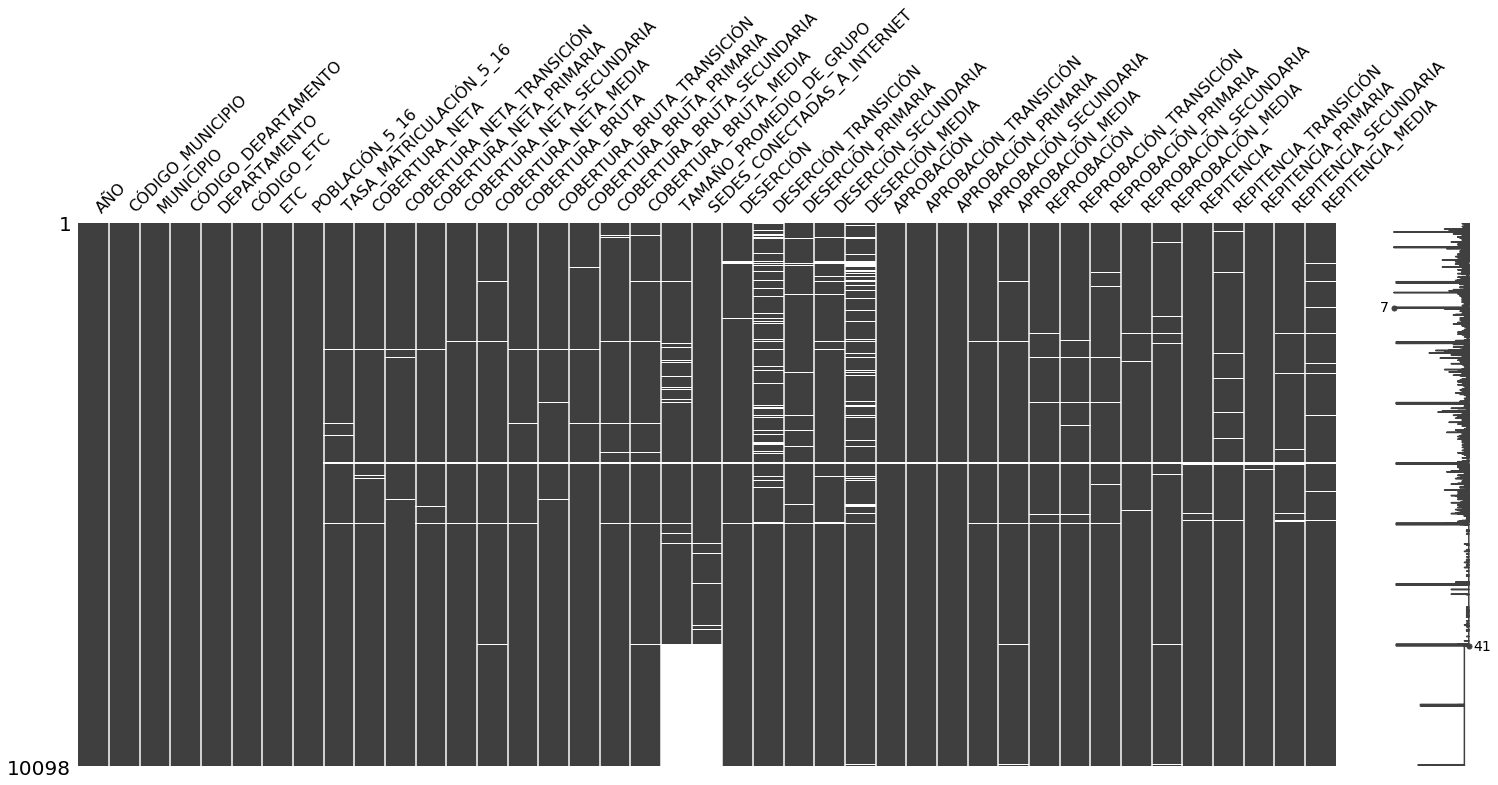

In [5]:
missingno.matrix(df)

In [51]:
df.columns

Index(['AÑO', 'CÓDIGO_MUNICIPIO', 'MUNICIPIO', 'CÓDIGO_DEPARTAMENTO',
       'DEPARTAMENTO', 'CÓDIGO_ETC', 'ETC', 'POBLACIÓN_5_16',
       'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA',
       'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
       'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA',
       'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
       'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
       'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
       'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA',
       'DESERCIÓN_MEDIA', 'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN',
       'APROBACIÓN_PRIMARIA', 'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA',
       'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
   

In [60]:
# Replace Names
normal = ['Atlántico', 'Bogotá, D.C.', 'Bolívar', 'Boyacá',
          'Chocó', 'Caquetá', 'Córdoba','Nariño',
          'Archipiélago de San Andrés, Providencia y Santa Catalina',
          'Guainía', 'Vaupés']
replace = ['Atlantico', 'Bogota D.C.', 'Bolivar', 'Boyaca',
          'Choco', 'Caqueta', 'Cordoba','Narino',
          'San Andres', 'Guainia', 'Vaupes']

for i in range(len(replace)):
    df['DEPARTAMENTO'].replace(normal[i], replace[i], inplace=True)

array_nombre_dep = df['DEPARTAMENTO'].unique()
#print(array_nombre_dep)

In [53]:
# Replace accents and ñ
municipios = df['MUNICIPIO'].unique()
print(len(municipios))
accents_replace = {'á':'a','Á':'A',
                   'é':'e','É':'E',
                   'í':'i','Í':'I',
                   'ó':'o','Ó':'O',
                   'ú':'u','Ú':'U',
                   'ñ':'n','Ñ':'N'}
keys_accents = list(accents_replace.keys())

array_raw = []
array_to_replace = []

for m in municipios:
    for k in keys_accents:
        if(k in m):
            array_raw.append(m)
            d_no_accent = m.replace(k,accents_replace[k])
            array_to_replace.append(d_no_accent)

# dictionary to replace in df
dict_to_replace = {
    'raw':array_raw,
    'replace':array_to_replace,
}

for i in range(len(array_raw)):
    df['MUNICIPIO'].replace(array_raw[i], array_to_replace[i], inplace=True)
df.shape

1036


(10098, 41)

In [59]:
# FIND CODES AND NAMES FOR 'MUNICIPIOS'
df_codes = df[['DEPARTAMENTO', 'CÓDIGO_DEPARTAMENTO', 'MUNICIPIO', 'CÓDIGO_MUNICIPIO']]
df_codes.shape
df_uniques = df_codes.drop_duplicates(keep='first', inplace=False)
df_uniques.shape
df_uniques

#df_uniques.to_csv('codes_all.csv', index = False)

In [8]:
# FIND CODES AND NAMES FOR 'DEPARTAMENTOS'
array_nombre_dep =df['DEPARTAMENTO'].unique()
array_codigo_dep = df['CÓDIGO_DEPARTAMENTO'].unique()
dict_cod_name = {
    'cod_dept':array_codigo_dep,
    'name_dept':array_nombre_dep,
}

# GENERATE CSV FILE
#df_depts = pd.DataFrame.from_dict(dict_cod_name)
#df_depts.to_csv('file.csv', index = False)

In [9]:
# STUDENTS THAT DROPED OUT IN NUMBERS
df['DESERTION_STUDENTS_N'] = (df['DESERCIÓN'].to_numpy()/100) * (df['TASA_MATRICULACIÓN_5_16'].to_numpy()/100) * df['POBLACIÓN_5_16'].to_numpy()
df['ENROLLED_STUDENTS_N'] = (df['TASA_MATRICULACIÓN_5_16'].to_numpy()/100)  * df['POBLACIÓN_5_16'].to_numpy()

df

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA,DESERTION_STUDENTS_N,ENROLLED_STUDENTS_N
0,2011,5001,Medellín,5,Antioquia,3759,Medellín,386466.0,108.7300,108.5000,...,0.0000,0.0100,0.1700,4.5700,0.1500,3.2600,7.4400,2.9500,15505.545378,420204.481800
1,2011,5002,Abejorral,5,Antioquia,3758,Antioquia (ETC),4146.0,97.8100,97.8000,...,1.2300,2.9600,1.1800,0.8900,0.0000,0.8500,1.0800,1.2300,253.855683,4055.202600
2,2011,5004,Abriaquí,5,Antioquia,3758,Antioquia (ETC),483.0,88.6100,88.6000,...,1.4700,14.6600,7.4600,1.6900,3.1300,1.4700,2.2200,0.0000,3.466689,427.986300
3,2011,5021,Alejandría,5,Antioquia,3758,Antioquia (ETC),702.0,118.5200,118.5000,...,2.1600,4.3900,8.0400,0.6000,0.0000,0.9600,0.0000,0.0000,33.530019,832.010400
4,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631.0,78.6500,78.7000,...,6.7300,14.4600,7.4500,0.4200,0.0000,0.2400,0.9100,0.0000,216.955710,5215.281500
5,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552.0,97.7100,97.7000,...,0.0000,0.0000,0.0000,NaN,0.8300,NaN,9.9300,4.4700,474.675180,5424.859200
6,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244.0,84.4500,84.5000,...,0.5800,0.0400,2.6900,5.4100,0.7300,5.5300,6.9000,4.1100,342.581897,8651.058000
7,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707.0,78.8500,78.9000,...,3.6100,9.5000,7.3200,0.7100,0.0000,0.7000,1.0800,0.0000,109.561917,1345.969500
8,2011,5038,Angostura,5,Antioquia,3758,Antioquia (ETC),3344.0,81.7000,81.7000,...,3.7300,1.9300,2.2700,3.9200,0.0000,5.1600,1.9200,2.9600,145.344954,2732.048000
9,2011,5040,Anorí,5,Antioquia,3758,Antioquia (ETC),3983.0,92.0900,92.1000,...,2.1400,1.0000,0.4200,0.4800,0.0000,0.6900,0.0000,0.0000,229.613338,3667.944700


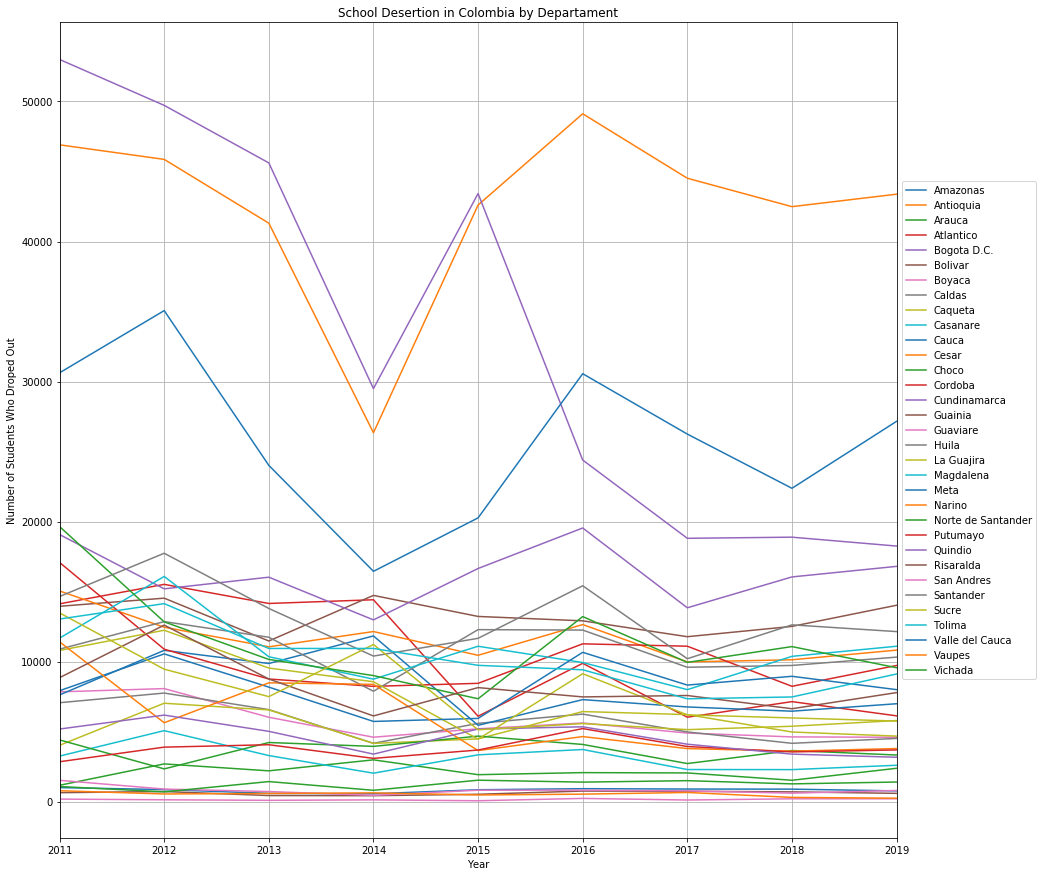

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
df.groupby(['AÑO', 'DEPARTAMENTO']).sum()['DESERTION_STUDENTS_N'].unstack().plot(ax=ax).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title("School Desertion in Colombia by Departament")
plt.xlabel("Year")
plt.ylabel("Number of Students Who Droped Out")
plt.grid(which='major')
plt.show()

In [11]:
df_year_dept_group = df.groupby(['DEPARTAMENTO','AÑO','CÓDIGO_DEPARTAMENTO'])[['DESERCIÓN']].mean()
df_year_dept_group_2 = df.groupby(['DEPARTAMENTO','AÑO','CÓDIGO_DEPARTAMENTO'])[['DESERTION_STUDENTS_N']].sum()
df_year_dept = pd.DataFrame(df_year_dept_group).reset_index()
df_year_dept_2 = pd.DataFrame(df_year_dept_group_2).reset_index()
df_year_dept['DESERTION_STUDENTS_N']= df_year_dept_2['DESERTION_STUDENTS_N']
df_year_dept.head()

,DEPARTAMENTO,AÑO,CÓDIGO_DEPARTAMENTO,DESERCIÓN,DESERTION_STUDENTS_N
0,Amazonas,2011,91,5.413333,1003.612554
1,Amazonas,2012,91,2.353333,863.408378
2,Amazonas,2013,91,2.232857,593.364593
3,Amazonas,2014,91,1.410000,563.007316
4,Amazonas,2015,91,3.240000,850.778732


In [12]:
df_year_national_g = df.groupby(['AÑO'])['DESERTION_STUDENTS_N'].sum()
df_year_national = pd.DataFrame(df_year_national_g).reset_index()

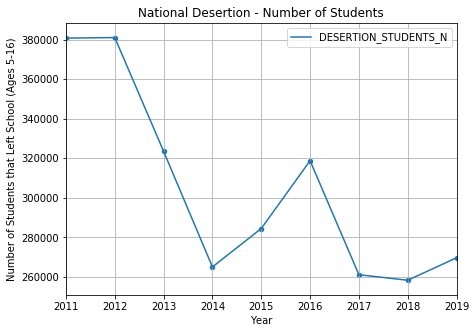

In [13]:
plt.figure(figsize=(7, 5))
ax = plt.gca()
df_year_national.plot(x='AÑO', y='DESERTION_STUDENTS_N', ax=ax)
df_year_national.plot.scatter(x='AÑO', y='DESERTION_STUDENTS_N', ax=ax)
plt.title("National Desertion - Number of Students")
plt.xlabel("Year")
plt.ylabel("Number of Students that Left School (Ages 5-16)")
plt.grid(which='minor')
plt.grid(which='major')
plt.show()


In [19]:
df_cob_year_national_g = df.groupby(['AÑO'])['COBERTURA_NETA'].mean()
df_cob_year_national = pd.DataFrame(df_cob_year_national_g).reset_index()

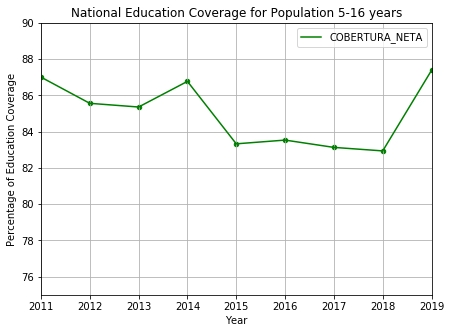

In [29]:
plt.figure(figsize=(7, 5))
ax = plt.gca()
df_cob_year_national.plot(x='AÑO', y='COBERTURA_NETA', ax=ax, color='green')
df_cob_year_national.plot.scatter(x='AÑO', y='COBERTURA_NETA', ax=ax, color='green')
plt.title("National Education Coverage for Population 5-16 years")
plt.xlabel("Year")
plt.ylabel("Percentage of Education Coverage")
plt.grid(which='minor')
plt.grid(which='major')
ax.set_ylim([75,90])
plt.show()


In [14]:
array_names = df_year_dept['DEPARTAMENTO'].unique()
array_values = np.zeros(len(array_names))
dict_frecuency = {}
for n in array_names:
    dict_frecuency[n]=0

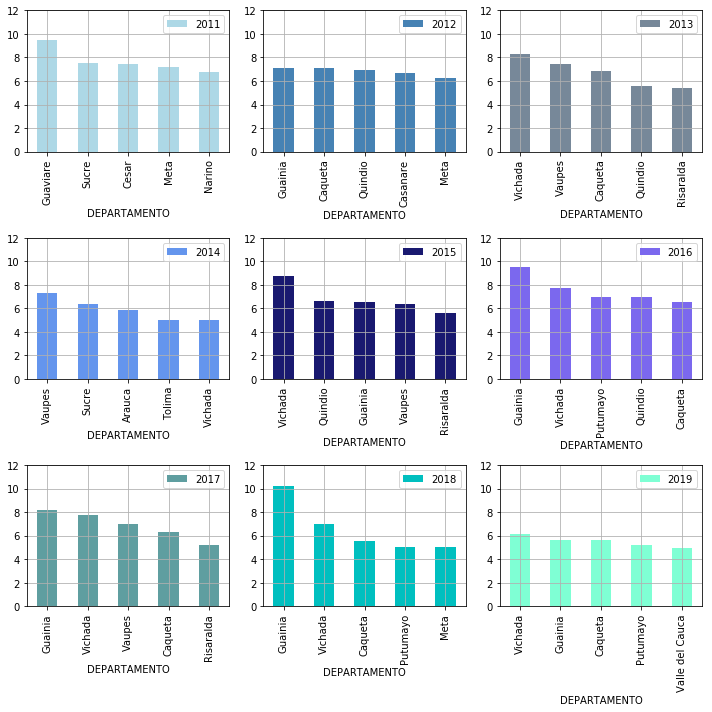

In [15]:
years_analysis = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
colors = ['lightblue', 'steelblue', 'lightslategray', 'cornflowerblue',
          'midnightblue', 'mediumslateblue', 'cadetblue', 'c', 'aquamarine']
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10,10))
axes_flat = axes.flatten()
counter = 0

for y in years_analysis:
    df_temp_x = df_year_dept[df_year_dept['AÑO']==y].sort_values(by=['DESERCIÓN'], ascending=False).head()
    df_temp = pd.DataFrame(df_temp_x).reset_index()
    df_temp.plot.bar(x='DEPARTAMENTO', y='DESERCIÓN',ax=axes_flat[counter], label=str(y), color=colors[counter])
    axes_flat[counter].set_ylim([0,12])
    axes_flat[counter].grid()
    counter +=1
    for d in df_temp['DEPARTAMENTO'].unique():
        dict_frecuency[d]=dict_frecuency[d]+1
plt.tight_layout()
plt.show()


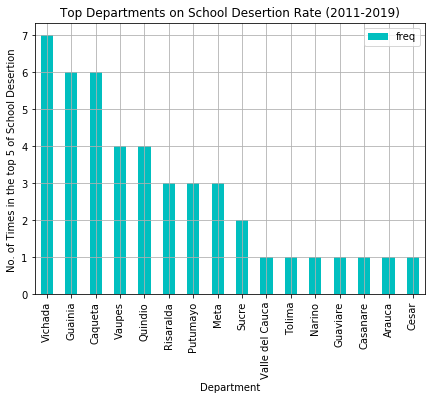

In [16]:

dict_frecuency_2 = {
    'names': array_names,
    'freq' : np.fromiter(dict_frecuency.values(), dtype=int),
}
df_f2 = pd.DataFrame.from_dict(dict_frecuency_2)


plt.figure(figsize=(7, 5))
ax = plt.gca()
df_f2.sort_values(by='freq', ascending=False).head(16).plot.bar(x='names', y='freq', color='c', ax=ax)
plt.title("Top Departments on School Desertion Rate (2011-2019)")
plt.xlabel("Department")
plt.ylabel("No. of Times in the top 5 of School Desertion ")
plt.grid(which='minor')
plt.grid(which='major')
plt.show()


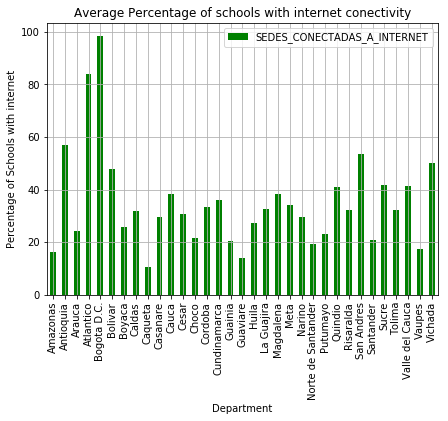

In [32]:
df_2018= df[df['AÑO']==2018]
df_internet_2018_g = df.groupby(['DEPARTAMENTO'])['SEDES_CONECTADAS_A_INTERNET'].mean()
df_internet_2018 = pd.DataFrame(df_internet_2018_g).reset_index()

plt.figure(figsize=(7, 5))
ax = plt.gca()
df_internet_2018.plot.bar(x='DEPARTAMENTO', y='SEDES_CONECTADAS_A_INTERNET', ax=ax, color='green')
plt.title("Average Percentage of schools with internet conectivity")
plt.xlabel("Department")
plt.ylabel("Percentage of Schools with internet")
plt.grid(which='minor')
plt.grid(which='major')
plt.show()